In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

In [18]:
file_path = 'pokemon.csv'
df = pd.read_csv(file_path, index_col=False, low_memory=False,)

# EDA

In [19]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [20]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


(   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
 0  1              Bulbasaur  Grass  Poison    318  45      49       49   
 1  2                Ivysaur  Grass  Poison    405  60      62       63   
 2  3               Venusaur  Grass  Poison    525  80      82       83   
 3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
 4  4             Charmander   Fire     NaN    309  39      52       43   
 
    Sp. Atk  Sp. Def  Speed  Generation  Legendary  
 0       65       65     45           1      False  
 1       80       80     60           1      False  
 2      100      100     80           1      False  
 3      122      120     80           1      False  
 4       60       50     65           1      False  ,
 None)

In [21]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Počet záznamů (Count)
Pro každý atribut je k dispozici 800 hodnot, což znamená, že dataset obsahuje informace o 800 Pokémonech.

### Průměrné hodnoty (Mean):
Celková síla Pokémonů je v průměru 362.81.
Průměrné HP (životy) je 69.26, útok 79.00, obrana 73.84, speciální útok 72.82, speciální obrana 71.90 a rychlost 68.28.
Průměrná generace je 3.32, což naznačuje, že většina Pokémonů pochází z prvních tří generací.

### Rozptyl hodnot (Směrodatná odchylka - Std):
Největší rozptyl je vidět u celkové statistiky (208.34), což značí, že výkon Pokémonů se výrazně liší.
Ostatní vlastnosti, jako útok a obrana, mají menší rozptyl, což naznačuje, že jejich hodnoty jsou v datasetu konzistentnější.

### Minimální hodnoty (Min):
Pokémon s nejnižším celkovým skóre má hodnotu 180.
Nejnižší hodnota HP je 1, rychlosti 5, což značí slabé Pokémony v těchto kategoriích.

### Kvartily (25%, 50%, 75%):
25 % Pokémonů má celkové statistiky pod 330, což značí spíše slabší Pokémony.
Medián celkových statistik je 450, což ukazuje na rovnoměrné rozložení silných a slabších Pokémonů.
75 % Pokémonů má celkové statistiky pod 515, takže pouze 25 % Pokémonů je výrazně silnějších.

### Maximální hodnoty (Max):
Nejlepší Pokémon má celkovou hodnotu 780.
Rychlost, útok a speciální útok dosahují maximálně 230, což odpovídá nejsilnějším Pokémonům v těchto kategoriích.

### Shrnutí:
Tabulka ukazuje velkou variabilitu v silách Pokémonů. Většina Pokémonů má průměrné statistiky kolem 362.81 bodů, ale mezi nimi jsou i výrazně slabší a silnější Pokémoni. Největší rozdíly jsou patrné v celkových statistikách, rychlosti a speciálním útoku.

## Druhy pokémonů
Obsahuje 18 různých typů Pokémonů. Každý pokémon má alespoň jeden typ, nektěří Pokémonové mají i 2. typ, který upřesňuje jeho vlastnosti. Například pokud 1. typ je "Dragon", 2. typ může být například "Dark" nebo "Fire". Pokud 2. typ nemá, je u pokémona záznam "nan"

In [22]:
df['Type 1'].unique()
# len(df['Type 1'].unique()) = 18

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [23]:
df['Type 2'].unique()
# len(df['Type 2'].unique()) = 19

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

## Kontrola chybějících hodnot

Zde můžeme vidět, že 386 pokémonů nemá druhý typ.

In [24]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## Kontrola zduplikovaných hodnot

Žádný Pokémon se zde nevyskytuje vícekrát.

In [25]:
df.duplicated().sum()

np.int64(0)

## Datové typy

In [26]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

|Atribut|	Datový typ|Popis|
| --------      | -------    |-------        |
| hashtag| int64 | Unikátní ID každého Pokémona |
|Name|	object |Jméno každého Pokémona|
|Type 1|	object|Hlavní typ Pokémona, který určuje jeho |slabosti/odolnosti vůči útokům|
|Type 2| object |	Druhý typ (pokud má Pokémon dvojí typ)|
| Total	| int64 |Součet všech statistik uvedených níže, obecný ukazatel síly Pokémona|
| HP	| int64|Počet životů (hit points), určuje, kolik poškození Pokémon snese, než omdlí|
|Attack	|int64|Základní hodnota pro běžné útoky (např. Škrábnutí, Úder)
|Defense	|int64|Základní odolnost proti běžným útokům
|SP Atk|int64	|Speciální útok, základní hodnota pro speciální útoky (např. Ohnivý výbuch, Vodní dělo)
|SP Def	|int64|Základní odolnost proti speciálním útokům
|Speed	|int64|Rychlost, určuje, který Pokémon zaútočí první v každém kole
| Generation |int64| Generace, ve které byl Pokémon představen (např. 1 = první generace, 2 = druhá generace)|
| Legendary | bool | určuje, zda je Pokémon legendární (vzácný)


## Zjištění unikátních hodnot

V datasetu se vyskytují pokémoni z 6 generací, z nichž 65 je legendárních.

Zajímavostí je, že počet ID neodpovídá počtu názvů Pokémonů. To je způsobeno tím, že někteří pokémoni mají například různé velikosti (viz. tabulka). Pro shlukování jsou atributy jméno a ID irelevantní a budou v pre-processingu smazány.

| ID  | Name                     | Type 1 | Type 2 | Total | HP | Attack | Defense | Sp. Atk | Sp. Def | Speed | Generation | Legendary |
|-----|--------------------------|--------|--------|-------|----|--------|---------|---------|---------|-------|------------|-----------|
| 710 | PumpkabooAverage Size    | Ghost  | Grass  | 335   | 49 | 66     | 70      | 44      | 55      | 51    | 6          | False     |
| 710 | PumpkabooSmall Size      | Ghost  | Grass  | 335   | 44 | 66     | 70      | 44      | 55      | 56    | 6          | False     |
| 710 | PumpkabooLarge Size      | Ghost  | Grass  | 335   | 54 | 66     | 70      | 44      | 55      | 46    | 6          | False     |
| 710 | PumpkabooSuper Size      | Ghost  | Grass  | 335   | 59 | 66     | 70      | 44      | 55      | 41    | 6          | False     |


In [27]:
df.nunique()

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

## Legendární Pokémoni

Zajímavým atributem, který pro mě osobně na první pohled vyčnívá je atribut 'Legendary'.

In [28]:
legendary_pokemons = df[df['Legendary'] == True]
legendary_pokemons

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [29]:
alt.Chart(legendary_pokemons).mark_circle().encode(
    x='Total',
    y='HP',
    color='Type 1',
    tooltip=['Name', 'Type 1', 'Type 2', 'Total', 'HP']
).interactive()

alt.Chart(...)

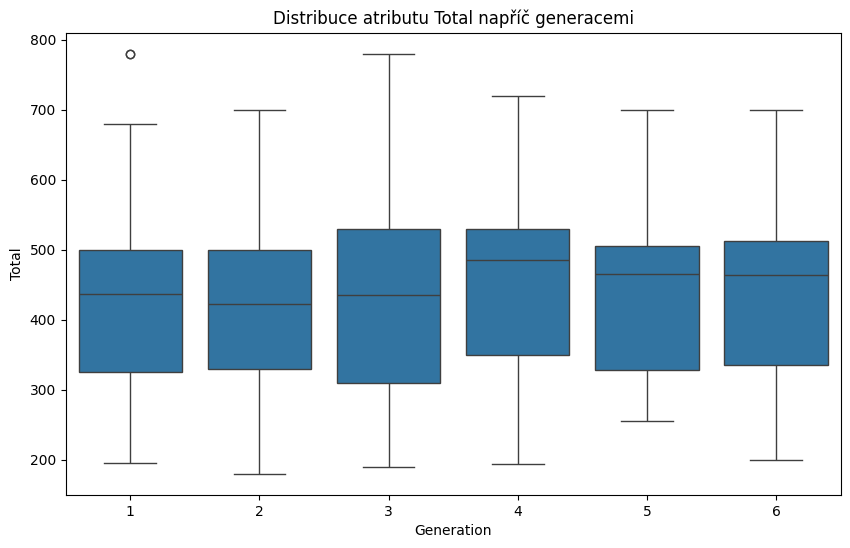

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Generation', y='Total', data=df)
plt.xlabel('Generation')
plt.ylabel('Total')
_ = plt.title('Distribuce atributu Total napříč generacemi')

Z krabicových grafů můžeme pozorovat celkem rovnoměrné rozdělení Pokémonů do generací.
Lze zde pozorovat hned 3 zajímavosti:

1) Outlier v první generaci (Pokémon, který spadá do první generace a je velmi silný).

2) 3. generace má velký rozsah celkové síly Pokémonů.

3) Mediány pro 4,5 a 6 generaci jsou podobné.

## Popis numerických atributů

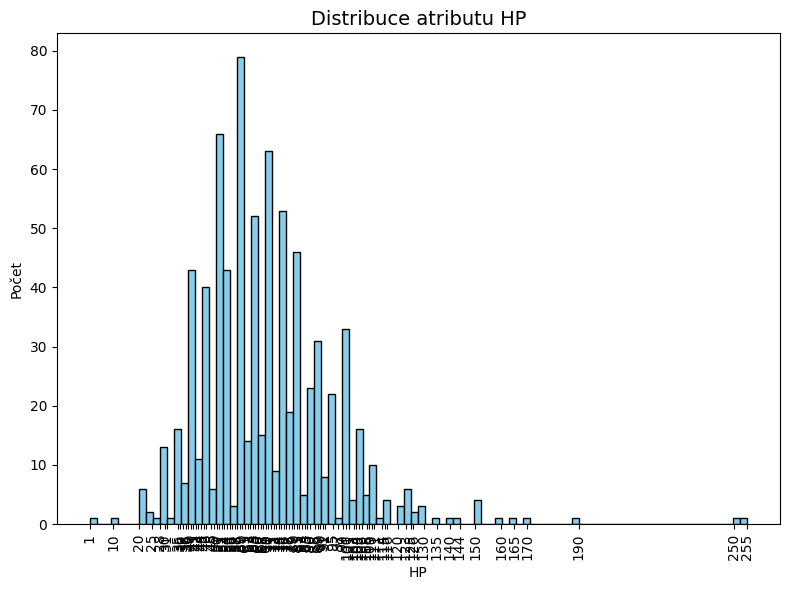

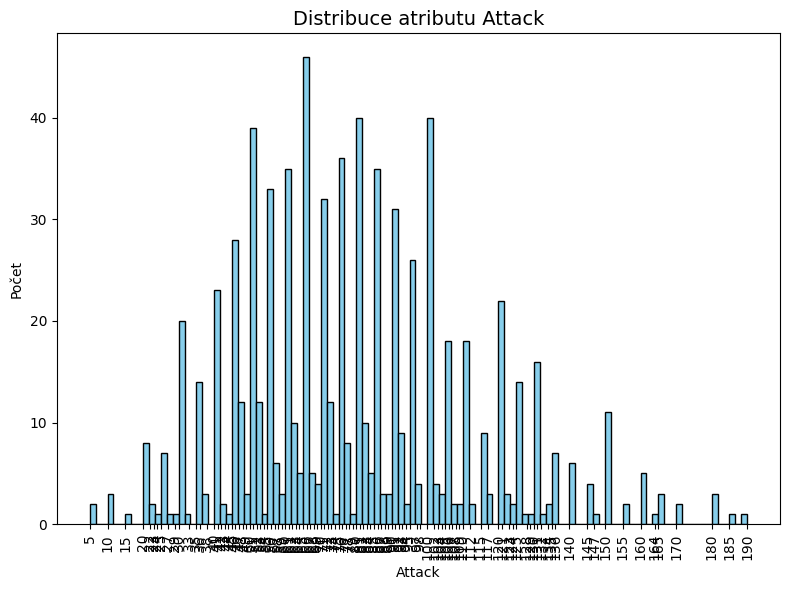

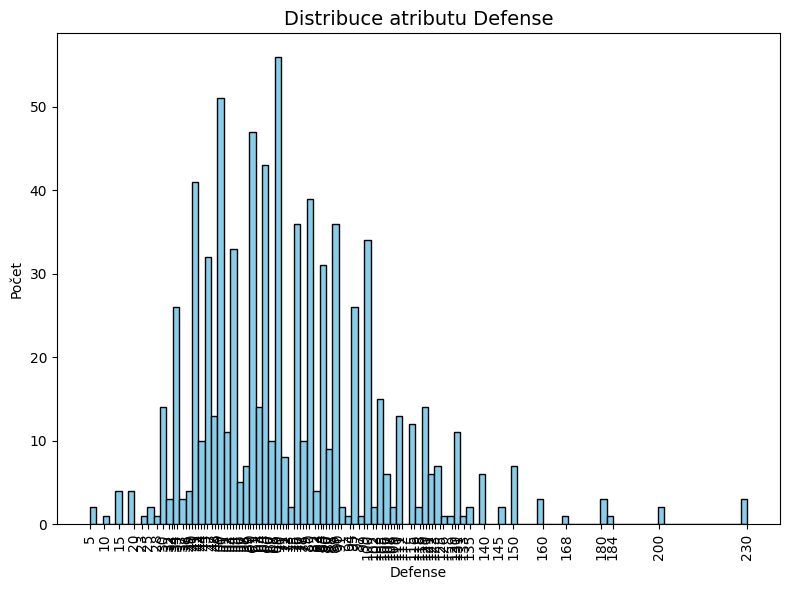

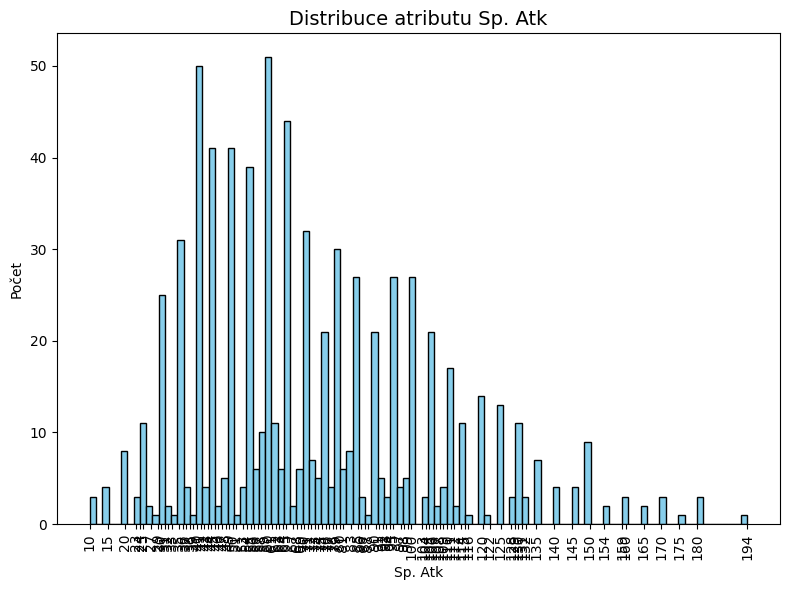

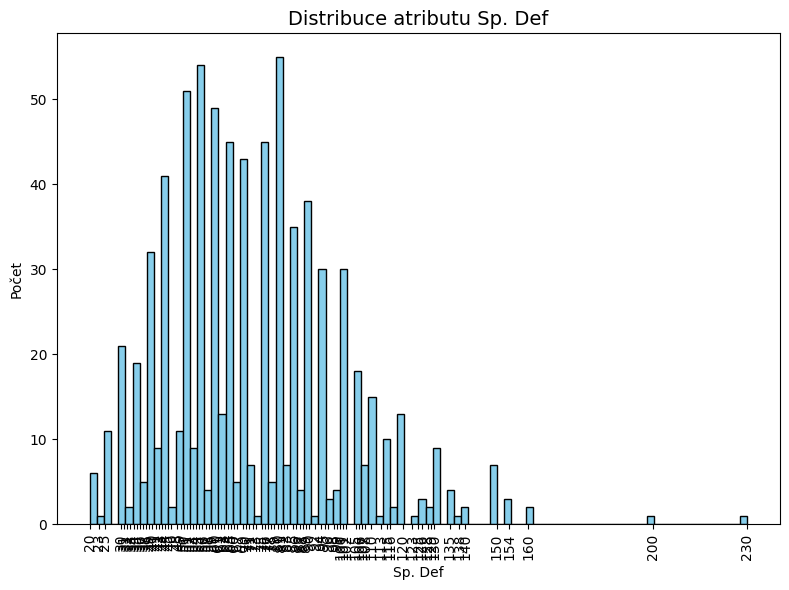

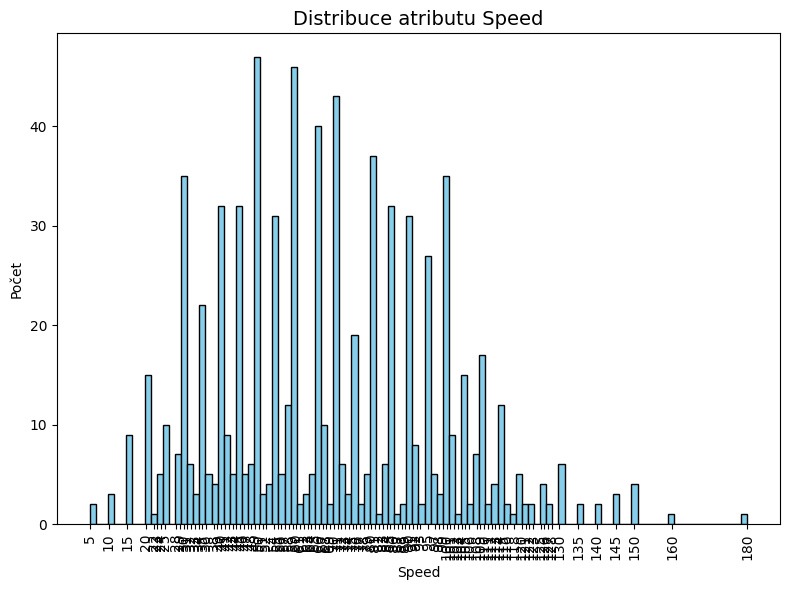

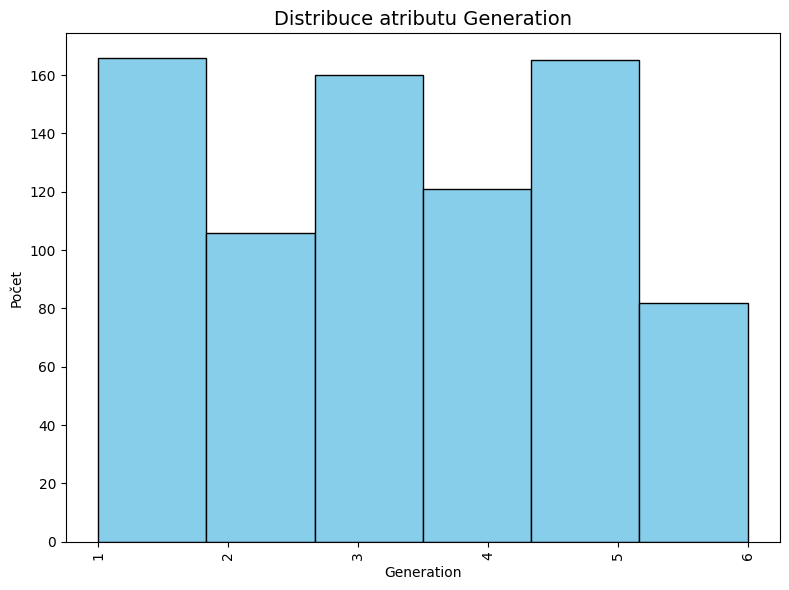

In [31]:
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
for attribute in attributes:
  plt.figure(figsize=(8, 6))
  data = df[attribute].dropna()
  plt.hist(data, bins=len(data.unique()), color='skyblue', edgecolor='black', align='mid')

  plt.xticks(sorted(data.unique()), rotation=90)
  plt.title(f'Distribuce atributu {attribute}', fontsize=14)
  plt.xlabel(f'{attribute}')
  plt.ylabel('Počet')

  plt.tight_layout()
  plt.show()


### Popis
Číselné atributy 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation' mají normální rozdělení. Úsudek o typu rozdělení nám udává, který typ scaleru použijeme. V tomto případě pro všechny atributy použijeme StandardScaler.

Jediná výjimka je atribut 'Generation', který má rovnoměrné rozdělení.
Z toho vyplývá, že autoři vytvářeli pro každou generaci cca stejný počet Pokémonů. Jediná výjimka co lze z grafu vyčíst je generace 6, kde autorům asi docházely nápady. ;)

## Popis kategoriálních atributů

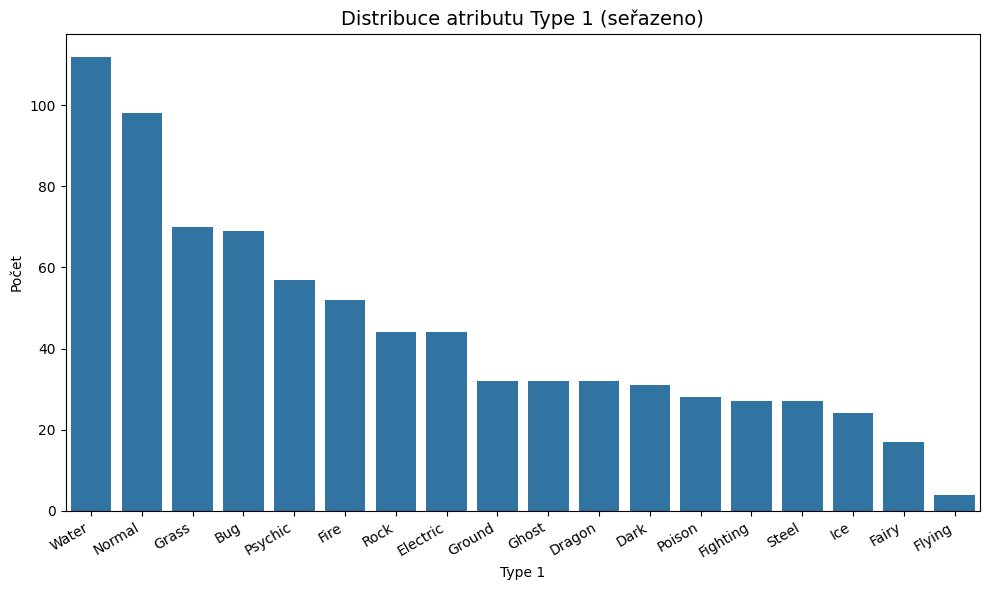

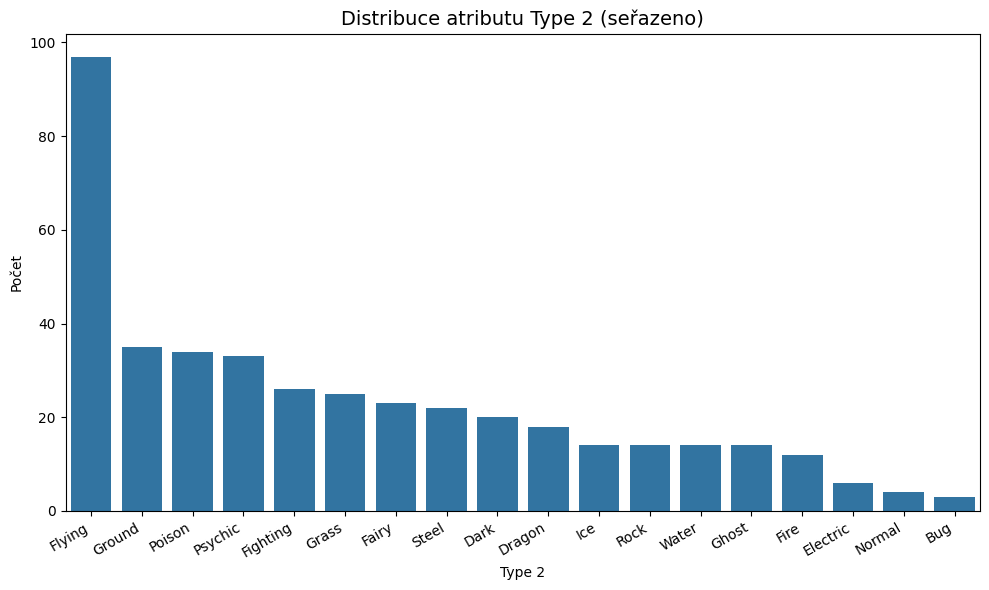

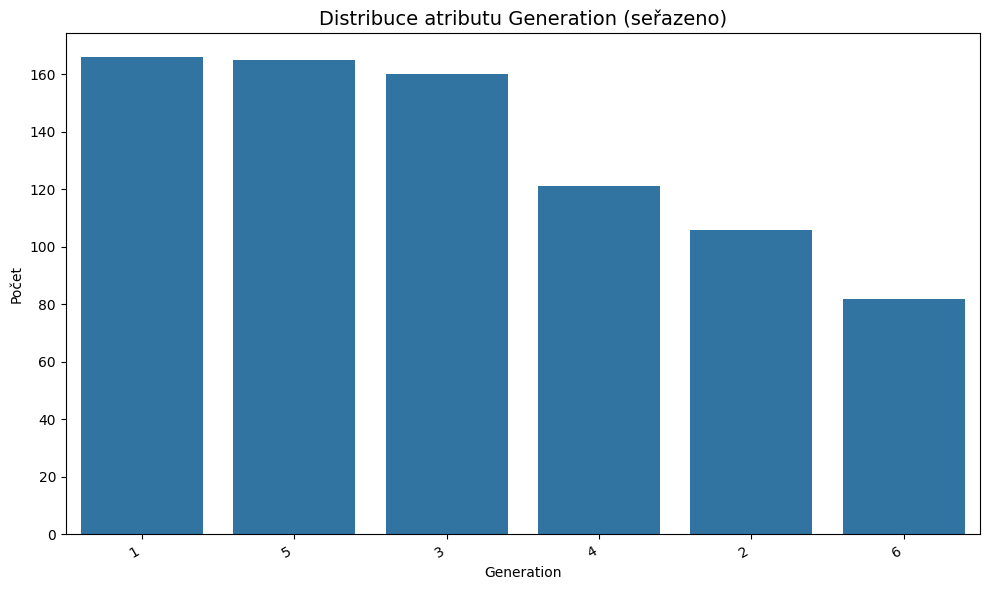

In [32]:
attributes = ['Type 1', 'Type 2', 'Generation']
for attribute in attributes:
  plt.figure(figsize=(10, 6))
  plt.ylabel('Počet')
  plt.title(f'Distribuce atributu {attribute} (seřazeno)', fontsize=14)
  plt.xlabel(f'{attribute}')
  sns.countplot(data=df, x=attribute, order=df[attribute].value_counts().index)
  plt.xticks(rotation=30, ha='right')
  plt.tight_layout()
  plt.show()

### Popis
Největší zastoupení u 'Type 1' mají: Water, Normal, Grass a naopak nejmenší zastoupení mají Flying, Fairy, Ice

Největší zastoupení u 'Type 2' mají: Flying, Ground, Poison a naopak nejmenší zastoupení mají Bug, Normal, Electric



## Korelační matice pro numerické hodnoty

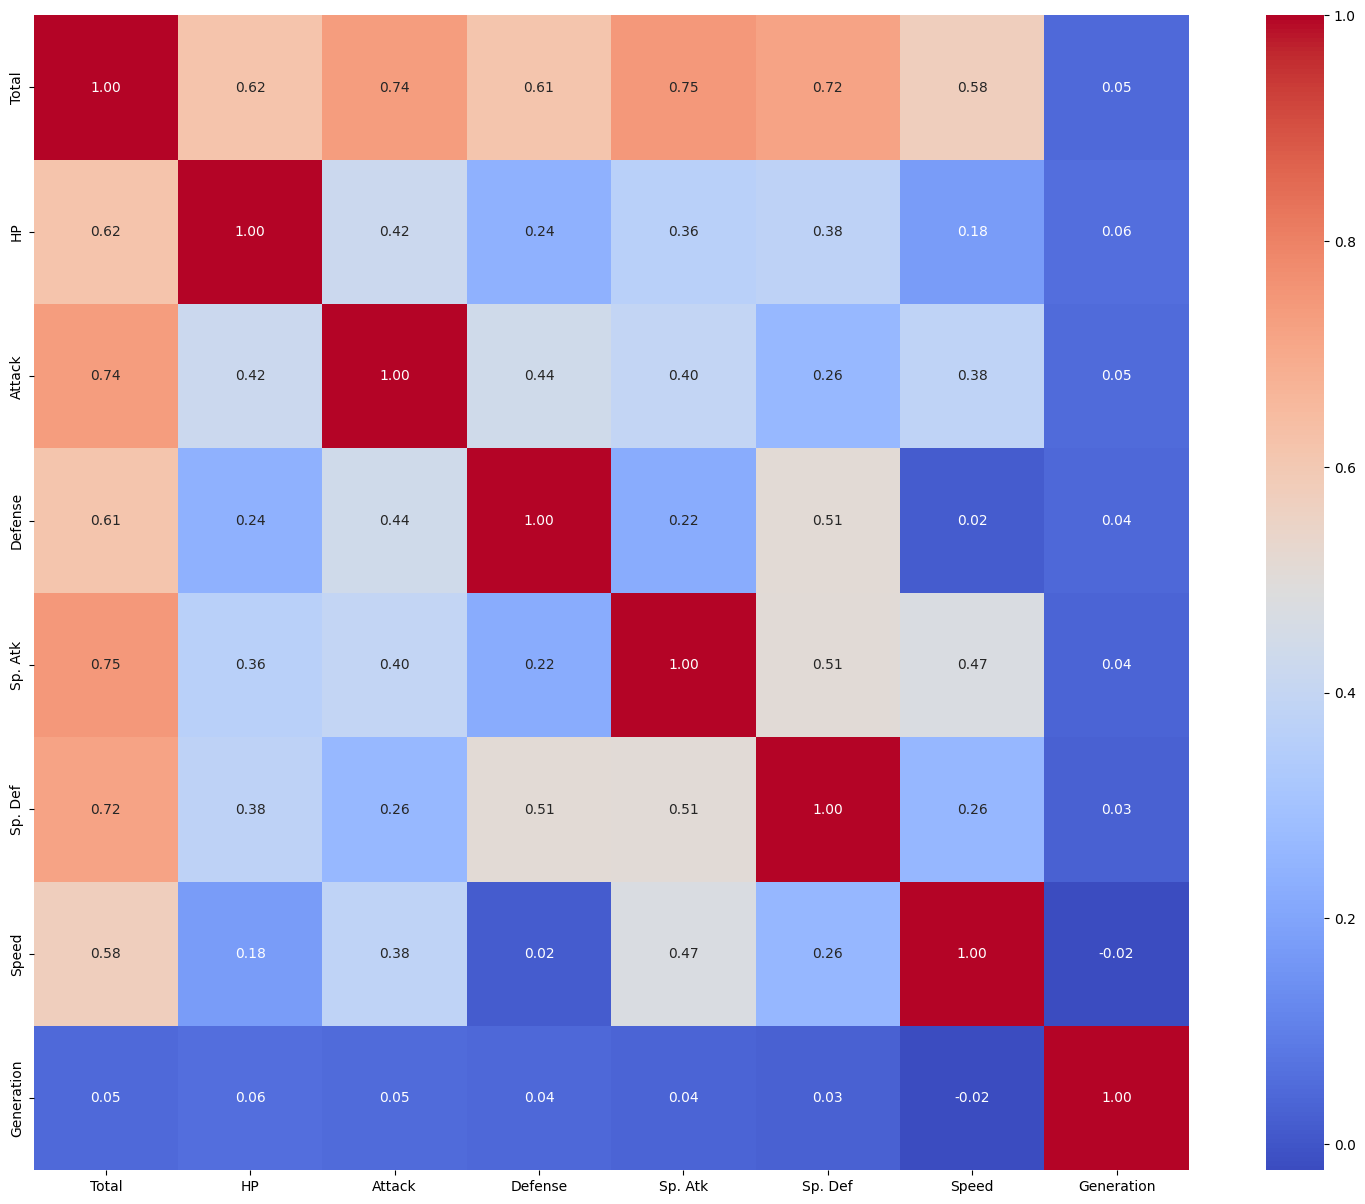

In [33]:
numeric_df = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]
corr_mat = numeric_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_mat, cmap='coolwarm', square=True, annot=True, fmt='.2f')
plt.show()

### Popis
Celková statistika Pokémonů je silně ovlivněna útokem, speciálním útokem a speciální obranou.
Obranné statistiky (obrana a speciální obrana) jsou navzájem pozitivně korelované, ale nemají téměř žádný vztah k rychlosti.
Generace Pokémonů nemá významnou korelaci s ostatními vlastnostmi.
Pokémoni s vysokým HP často nemají silnou rychlost ani obranu.
Tato korelační matice je užitečná pro pochopení vztahů mezi různými atributy Pokémonů a může pomoci při analýze nebo predikci jejich výkonu.

# Pre-processing

Z EDA plyne zjištění, že atributy "#" a "Name" nejsou důležité pro následující zpracování dat.

In [34]:
df_scaled= df.drop(['#', 'Name'], axis=1)

Atributy 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed' mají normální rozdělení, proto bude v pre-processing části použit StandardScaler

In [35]:
standard_scaler = StandardScaler()
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for attribute in attributes:
  df_scaled[attribute] = standard_scaler.fit_transform(df[[attribute]])

Atributy "Type 1" a "Type 2" lze převést pomocí One-Hot Encoding každý typ na samostatný binární atribut. Tím v dalších krocích modelům umožníme pracovat s tímto atributem jako s kategorií.

In [36]:
pokemon_data = df_scaled

# One-Hot Encoding
type1_encoded = pd.get_dummies(pokemon_data['Type 1'], prefix='Type1')
type2_encoded = pd.get_dummies(pokemon_data['Type 2'], prefix='Type2')

pokemon_data_encoded = pd.concat([pokemon_data, type1_encoded, type2_encoded], axis=1)
pokemon_data_encoded.drop(['Generation', 'Type 1', 'Type 2'], axis=1, inplace=True)

df_scaled = pokemon_data_encoded

# Klasifikace "Legendary"
V této části se zaměříme na predikci atributu "Legendary".

# 1. Klasifikace (DecisionTree)

In [ ]:
# Define features (X) and target variable (y)
X = df_scaled.drop('Legendary', axis=1)  # Features
y = df_scaled['Legendary']  # Target variable

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform initial cross-validation with default parameters
initial_scores = cross_val_score(clf, X, y, cv=kf, scoring='f1', n_jobs=-1)
print(f"Default DecisionTree - Average F1 score: {initial_scores.mean():.4f}")
print(f"Default DecisionTree - Best F1 score: {initial_scores.max():.4f}")

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kf, scoring='f1', n_jobs=-1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and cross-validation score
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_
print(f"Tuned DecisionTree - Best hyperparameters: {best_params}")
print(f"Tuned DecisionTree - Best cross-validation F1 score: {best_cv_score:.4f}")

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
test_f1 = f1_score(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Tuned DecisionTree - F1 score on test data: {test_f1:.4f}")
print(f"Tuned DecisionTree - Accuracy on test data: {test_accuracy:.4f}")
# print("Classification report:\n")
# print(classification_report(y_test, y_pred))

Default DecisionTree - Average F1 score: 0.7165
Default DecisionTree - Best F1 score: 0.8000
Tuned DecisionTree - Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Tuned DecisionTree - Best cross-validation F1 score: 0.7925
Tuned DecisionTree - F1 score on test data: 0.8421
Tuned DecisionTree - Accuracy on test data: 0.9812


# 2. Klasifikace (RandomForest)

In [38]:
# 20min

# Define features (X) and target variable (y)
X = df_scaled.drop('Legendary', axis=1)  # Features
y = df_scaled['Legendary']  # Target variable


# Define the parameter grid for Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform initial cross-validation with default Random Forest parameters
rf_initial_scores = cross_val_score(rf_clf, X, y, cv=kf, scoring='f1', n_jobs=-1)
print(f"Default RandomForest - Average F1 score: {rf_initial_scores.mean():.4f}")
print(f"Default RandomForest - Best F1 score: {rf_initial_scores.max():.4f}")

# Perform hyperparameter tuning for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=kf, scoring='f1', n_jobs=-1)

# Fit the grid search for Random Forest
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and cross-validation score for Random Forest
rf_best_params = rf_grid_search.best_params_
rf_best_cv_score = rf_grid_search.best_score_
print(f"Tuned RandomForest - Best hyperparameters: {rf_best_params}")
print(f"Tuned RandomForest - Best cross-validation F1 score: {rf_best_cv_score:.4f}")

# Evaluate the best Random Forest model on the test set
rf_best_clf = rf_grid_search.best_estimator_
rf_y_pred = rf_best_clf.predict(X_test)
rf_test_f1 = f1_score(y_test, rf_y_pred)
rf_test_accuracy = accuracy_score(y_test, rf_y_pred)

print(f"Tuned RandomForest - F1 score on test data: {rf_test_f1:.4f}")
print(f"Tuned RandomForest - Accuracy on test data: {rf_test_accuracy:.4f}")
# print("RandomForest Classification report:\n")
# print(classification_report(y_test, rf_y_pred))


Default RandomForest - Average F1 score: 0.6272
Default RandomForest - Best F1 score: 0.6667
Tuned RandomForest - Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned RandomForest - Best cross-validation F1 score: 0.7694
Tuned RandomForest - F1 score on test data: 0.6364
Tuned RandomForest - Accuracy on test data: 0.9500


In [39]:
"""
Default RandomForest - Average F1 score: 0.6272
Default RandomForest - Best F1 score: 0.6667
Tuned RandomForest - Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned RandomForest - Best cross-validation F1 score: 0.7694
Tuned RandomForest - F1 score on test data: 0.6364
Tuned RandomForest - Accuracy on test data: 0.9500
"""

"\nDefault RandomForest - Average F1 score: 0.6272\nDefault RandomForest - Best F1 score: 0.6667\nTuned RandomForest - Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}\nTuned RandomForest - Best cross-validation F1 score: 0.7694\nTuned RandomForest - F1 score on test data: 0.6364\nTuned RandomForest - Accuracy on test data: 0.9500\n"

# 3. Klasifikace (LogisticRegression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import f1_score, classification_report, accuracy_score

# Define features (X) and target variable (y)
X = df_scaled.drop('Legendary', axis=1)  # Features
y = df_scaled['Legendary']  # Target variable

# Define the parameter grid for Logistic Regression hyperparameter tuning
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# Initialize the Logistic Regression classifier
lr_clf = LogisticRegression(random_state=42, max_iter=1000)

# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform initial cross-validation with default Logistic Regression parameters
lr_initial_scores = cross_val_score(lr_clf, X, y, cv=kf, scoring='f1', n_jobs=-1)
print(f"Default LogisticRegression - Average F1 score: {lr_initial_scores.mean():.4f}")
print(f"Default LogisticRegression - Best F1 score: {lr_initial_scores.max():.4f}")

# Perform hyperparameter tuning for Logistic Regression
lr_grid_search = GridSearchCV(estimator=lr_clf, param_grid=lr_param_grid, cv=kf, scoring='f1', verbose=1, n_jobs=-1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the grid search for Logistic Regression
lr_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and cross-validation score for Logistic Regression
lr_best_params = lr_grid_search.best_params_
lr_best_cv_score = lr_grid_search.best_score_
print(f"Tuned LogisticRegression - Best hyperparameters: {lr_best_params}")
print(f"Tuned LogisticRegression - Best cross-validation F1 score: {lr_best_cv_score:.4f}")

# Evaluate the best Logistic Regression model on the test set
lr_best_clf = lr_grid_search.best_estimator_
lr_y_pred = lr_best_clf.predict(X_test)
lr_test_f1 = f1_score(y_test, lr_y_pred)
lr_test_accuracy = accuracy_score(y_test, lr_y_pred)

print(f"Tuned LogisticRegression - F1 score on test data: {lr_test_f1:.4f}")
print(f"Tuned LogisticRegression - Accuracy on test data: {lr_test_accuracy:.4f}")
print("LogisticRegression Classification report:\n")
print(classification_report(y_test, lr_y_pred))

Default LogisticRegression - Average F1 score: 0.5626
Default LogisticRegression - Best F1 score: 0.6667
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Tuned LogisticRegression - Best hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned LogisticRegression - Best cross-validation F1 score: 0.6472
Tuned LogisticRegression - F1 score on test data: 0.6957
Tuned LogisticRegression - Accuracy on test data: 0.9563
LogisticRegression Classification report:

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       150
        True       0.62      0.80      0.70        10

    accuracy                           0.96       160
   macro avg       0.80      0.88      0.84       160
weighted avg       0.96      0.96      0.96       160



C:\Users\kubik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
375 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kubik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kubik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pa

# 4. Klasifikace Gradient Boosting

In [42]:
# Define features (X) and target variable (y)
X = df_scaled.drop('Legendary', axis=1)  # Features
y = df_scaled['Legendary']  # Target variable

# Define the parameter grid for Gradient Boosting hyperparameter tuning
gb_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform initial cross-validation with default Gradient Boosting parameters
gb_initial_scores = cross_val_score(gb_clf, X, y, cv=kf, scoring='f1', n_jobs=-1)
print(f"Default GradientBoosting - Average F1 score: {gb_initial_scores.mean():.4f}")
print(f"Default GradientBoosting - Best F1 score: {gb_initial_scores.max():.4f}")

# Perform hyperparameter tuning for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_clf, param_grid=gb_param_grid, cv=kf, scoring='f1', verbose=1, n_jobs=-1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the grid search for Gradient Boosting
gb_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and cross-validation score for Gradient Boosting
gb_best_params = gb_grid_search.best_params_
gb_best_cv_score = gb_grid_search.best_score_
print(f"Tuned GradientBoosting - Best hyperparameters: {gb_best_params}")
print(f"Tuned GradientBoosting - Best cross-validation F1 score: {gb_best_cv_score:.4f}")

# Evaluate the best Gradient Boosting model on the test set
gb_best_clf = gb_grid_search.best_estimator_
gb_y_pred = gb_best_clf.predict(X_test)
gb_test_f1 = f1_score(y_test, gb_y_pred)
gb_test_accuracy = accuracy_score(y_test, gb_y_pred)

print(f"Tuned GradientBoosting - F1 score on test data: {gb_test_f1:.4f}")
print(f"Tuned GradientBoosting - Accuracy on test data: {gb_test_accuracy:.4f}")
print("GradientBoosting Classification report:\n")
print(classification_report(y_test, gb_y_pred))


Default GradientBoosting - Average F1 score: 0.7146
Default GradientBoosting - Best F1 score: 0.8333
Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Tuned GradientBoosting - Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Tuned GradientBoosting - Best cross-validation F1 score: 0.7999
Tuned GradientBoosting - F1 score on test data: 0.8000
Tuned GradientBoosting - Accuracy on test data: 0.9688
GradientBoosting Classification report:

              precision    recall  f1-score   support

       False       1.00      0.97      0.98       150
        True       0.67      1.00      0.80        10

    accuracy                           0.97       160
   macro avg       0.83      0.98      0.89       160
weighted avg       0.98      0.97      0.97       160



# Závěr

## DecisionTree
Default DecisionTree - Average F1 score: 0.7165
Default DecisionTree - Best F1 score: 0.8000
Tuned DecisionTree - Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Tuned DecisionTree - Best cross-validation F1 score: 0.7925
Tuned DecisionTree - F1 score on test data: 0.8421
Tuned DecisionTree - Accuracy on test data: 0.9812


## RandomForest
Default RandomForest - Average F1 score: 0.6272
Default RandomForest - Best F1 score: 0.6667
Tuned RandomForest - Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned RandomForest - Best cross-validation F1 score: 0.7694
Tuned RandomForest - F1 score on test data: 0.6364
Tuned RandomForest - Accuracy on test data: 0.9500


## LogisticRegression
Default LogisticRegression - Average F1 score: 0.5626
Default LogisticRegression - Best F1 score: 0.6667
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Tuned LogisticRegression - Best hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned LogisticRegression - Best cross-validation F1 score: 0.6472
Tuned LogisticRegression - F1 score on test data: 0.6957
Tuned LogisticRegression - Accuracy on test data: 0.9563


## Gradient Boosting
Default GradientBoosting - Average F1 score: 0.7146
Default GradientBoosting - Best F1 score: 0.8333
Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Tuned GradientBoosting - Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Tuned GradientBoosting - Best cross-validation F1 score: 0.7999
Tuned GradientBoosting - F1 score on test data: 0.8000
Tuned GradientBoosting - Accuracy on test data: 0.9688

| Model               | Average F1 Score | Best F1 Score | Best Hyperparameters                                                                 | Best CV F1 Score | F1 Score on Test Data | Accuracy on Test Data |
|---------------------|------------------|---------------|-------------------------------------------------------------------------------------|------------------|-----------------------|-----------------------|
| **Decision Tree**    | 0.7165           | 0.8000        | {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5} | 0.7925           | 0.8421                | 0.9812                |
| **Random Forest**    | 0.6272           | 0.6667        | {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} | 0.7694           | 0.6364                | 0.9500                |
| **Logistic Regression** | 0.5626         | 0.6667        | {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}                      | 0.6472           | 0.6957                | 0.9563                |
| **Gradient Boosting** | 0.7146          | 0.8333        | {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0} | 0.7999           | 0.8000                | 0.9688                |


# Klasifikace "Type 1"

In [50]:
df_scaled= df.drop(['#', 'Name'], axis=1)
standard_scaler = StandardScaler()
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for attribute in attributes:
  df_scaled[attribute] = standard_scaler.fit_transform(df[[attribute]])


In [51]:
def elemental_category(type_):
    return 1 if type_ in ['Fire', 'Water', 'Electric', 'Ice', 'Ground'] else 0

def organism_category(type_):
    return 1 if type_ in ['Bug', 'Normal', 'Fighting', 'Rock', 'Ghost'] else 0

def mystical_category(type_):
    return 1 if type_ in ['Fairy', 'Psychic', 'Dragon'] else 0

# Aplikuj funkce na každý typ
df_scaled['Elemental'] = df_scaled['Type 1'].apply(elemental_category)
df_scaled['Organism'] = df_scaled['Type 1'].apply(organism_category)
df_scaled['Mystical'] = df_scaled['Type 1'].apply(mystical_category)

Pomocí tzv. Feature Engineering vytvoříme nové

In [52]:
df_scaled

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Elemental,Organism,Mystical
0,Grass,Poison,318,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,1,False,0,0,0
1,Grass,Poison,405,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,1,False,0,0,0
2,Grass,Poison,525,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,1,False,0,0,0
3,Grass,Poison,625,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,1,False,0,0,0
4,Fire,NaN,309,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,1,False,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341,6,True,0,1,0
796,Rock,Fairy,700,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611,6,True,0,1,0
797,Psychic,Ghost,600,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310,6,True,0,0,1
798,Psychic,Dark,680,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635,6,True,0,0,1


# Klasifikace MultiOutputClassifier

In [ ]:
# Define features (X) and target variable (y)
X = df_scaled.drop('Legendary', axis=1)  # Features
y = df_scaled['Legendary']  # Target variable

# Define the parameter grid for Gradient Boosting hyperparameter tuning
moc_param_grid = {}

# Initialize the Gradient Boosting classifier
moc_clf = MultiOutputClassifier(random_state=42)

# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform initial cross-validation with default Gradient Boosting parameters
moc_initial_scores = cross_val_score(moc_clf, X, y, cv=kf, scoring='f1', n_jobs=-1)
print(f"Default MultiOutputClassifier - Average F1 score: {moc_initial_scores.mean():.4f}")
print(f"Default MultiOutputClassifier - Best F1 score: {moc_initial_scores.max():.4f}")

# Perform hyperparameter tuning for Gradient Boosting
moc_grid_search = GridSearchCV(estimator=moc_clf, param_grid=moc_param_grid, cv=kf, scoring='f1', verbose=1, n_jobs=-1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the grid search for Gradient Boosting
moc_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and cross-validation score for Gradient Boosting
moc_best_params = moc_grid_search.best_params_
moc_best_cv_score = moc_grid_search.best_score_
print(f"Tuned MultiOutputClassifier - Best hyperparameters: {moc_best_params}")
print(f"Tuned MultiOutputClassifier - Best cross-validation F1 score: {moc_best_cv_score:.4f}")

# Evaluate the best Gradient Boosting model on the test set
moc_best_clf = moc_grid_search.best_estimator_
moc_y_pred = moc_best_clf.predict(X_test)
moc_test_f1 = f1_score(y_test, moc_y_pred)
moc_test_accuracy = accuracy_score(y_test, moc_y_pred)

print(f"Tuned MultiOutputClassifier - F1 score on test data: {moc_test_f1:.4f}")
print(f"Tuned MultiOutputClassifier - Accuracy on test data: {moc_test_accuracy:.4f}")
print("MultiOutputClassifier Classification report:\n")
print(classification_report(y_test, moc_y_pred))
